In [1]:
import json
import os, sys
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [4]:
with open('adguard-neg/issues.json') as f:
    issues = json.load(f)

1539
1
2023-09-03 22:50:03
2023-09-03 22:50:03


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([19603.45142361, 19603.46142361, 19603.47142361, 19603.48142361,
        19603.49142361, 19603.50142361, 19603.51142361, 19603.52142361,
        19603.53142361, 19603.54142361, 19603.55142361, 19603.56142361,
        19603.57142361, 19603.58142361, 19603.59142361, 19603.60142361,
        19603.61142361, 19603.62142361, 19603.63142361, 19603.64142361,
        19603.65142361, 19603.66142361, 19603.67142361, 19603.68142361,
        19603.69142361, 19603.70142361, 19603.71142361, 19603.72142361,
        19603.73142361, 19603.74142361, 19603.

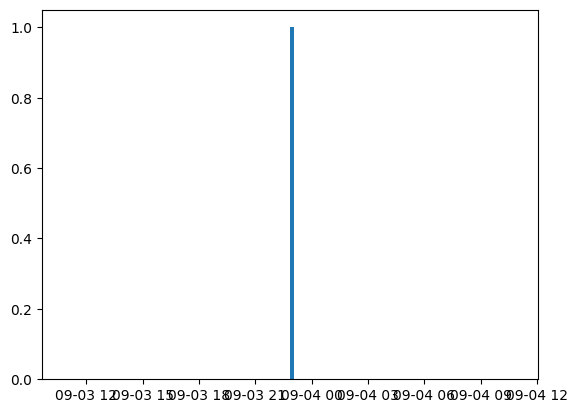

In [5]:
bad_issues = []
good_issues = []
timestamps = []

test_issue_title = [
    "### Issue URL",
    "**Issue URL",
    "Where is the problem encountered?"
]

oldest_data = datetime.strptime('2050-01-01T00:00:00Z', '%Y-%m-%dT%H:%M:%SZ')
start_after = datetime.strptime('2021-01-01T00:00:00Z', '%Y-%m-%dT%H:%M:%SZ')
end_before = datetime.strptime('2024-01-01T00:00:00Z', '%Y-%m-%dT%H:%M:%SZ')
newest_data = datetime.strptime('1900-01-01T00:00:00Z', '%Y-%m-%dT%H:%M:%SZ')
for issue in issues:
    
    if datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ') < start_after or datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ') > end_before:
        continue
    
    if all(x not in issue['body'] for x in test_issue_title):
        bad_issues.append(issue['number'])
        
        if datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ') < oldest_data:
            oldest_data = datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ')
        
        if datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ') > newest_data:
            newest_data = datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ')
            
        timestamps.append(datetime.strptime(issue['created_at'], '%Y-%m-%dT%H:%M:%SZ'))
        
    else:
        good_issues.append(issue['number'])
        

print(len(good_issues))
print(len(bad_issues))
print(oldest_data)
print(newest_data)

plt.hist(timestamps, bins=100)

In [8]:
out_df = pd.read_csv("adguard-neg/details.csv")

(out_df[out_df['should_include'] == True].created_at.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) > datetime(year=2023, month=1, day=1)).value_counts()

True    1221
Name: created_at, dtype: int64

<Axes: >

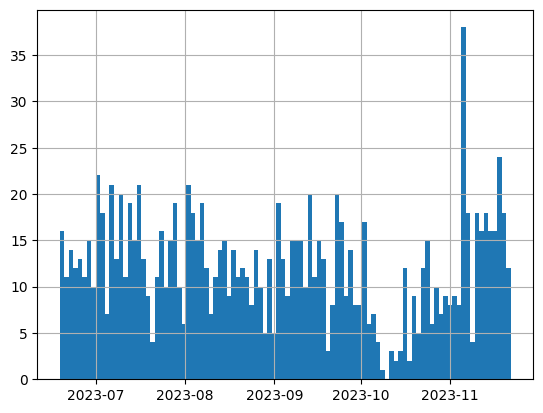

In [7]:
out_df[out_df['should_include'] == True].created_at.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).hist(bins=100)

In [110]:
import re

old_names = {
        "Peter Lowe's list": "Peter Lowe's Blocklist",
        "Fanboy's Cookiemonster List": "EasyList Cookie List",
        "Korean Adblock List": "List-KR",
        "AdGuard Annoyances": "AdGuard Annoyances filter",
        "AdGuard Popups": "AdGuard Popups filter",
        "Malware Domains Blocklist": "Online Malicious URL Blocklist",
        "Fanboy's Vietnamese": "Vietnamese adblock filter list",
        "AdGuard URL Tracking": "AdGuard URL Tracking filter", 
        "AdGuard Mobile Ads": "AdGuard Mobile App Banners filter",
        "AdGuard Mobile App Banners": "AdGuard Mobile App Banners filter",
        "Fanboy Anti-Facebook List": "Fanboy's Anti-Facebook List",
        "AdGuard Base": "AdGuard Base filter",
        "FanboyEspanol": "EasyList Spanish",
        "AdGuard Turkish": "AdGuard Turkish filter",
        "AdGuard Ukrainian": "AdGuard Ukrainian filter",
        "AdGuard Simplified domain names": "Adguard DNS filter",
        "AdGuard Cookie Notices": "AdGuard Cookie Notices filter",
        "ROLIST": "ROList",
        "AdGuard Other Annoyances": "AdGuard Other Annoyances filter",
        "AdGuard French": "AdGuard French filter",
        "AdGuard Widgets": "AdGuard Widgets filter",
        "AdGuard Tracking Protection": "AdGuard Tracking Protection filter",
        "AdGuard Dutch": "AdGuard Dutch filter",
        "AdGuard Experimental": "AdGuard Experimental filter",
        "Easylist Spanish": "EasyList Spanish",
        "AdGuard Japanese": "AdGuard Japanese filter",
        "AdGuard Spanish/Portuguese": "AdGuard Spanish/Portuguese filter",
        "AdGuard DNS": "Adguard DNS filter",
        "AdGuard Russian": "AdGuard Russian filter",
        "AdGuard German": "AdGuard German filter",
        "AdGuard Chinese": "AdGuard Chinese filter",
        "AdGuard Social Media": "AdGuard Social Media filter",
    }

def extract_filters_from_system_config(post: str):
    
    filters = []
    sys_conf_i = post.find("System configuration")
    filters_i = post.find("Filters:", sys_conf_i)
    
    if filters_i == -1:
        raise KeyError("No filters found")
    
    lines = post[filters_i:].split("\n")
    
    if len(lines) > 1 and ":" not in lines[1]:
        raise KeyError("Filter Not As Expected")
        
    filters_text = lines[0].split(" | ")[1]
    
    # remove everything between <b> ... </b> and what is in them
    
    b_ptrn = r'<b>(.*?)</b>'
    
    filters_text = re.sub(b_ptrn, "", filters_text)
    
    # split by <br/> and remove empty strings
    
    filters = list(filter(lambda x: len(x), filters_text.split("<br/>")))
    
    # remove remaining tags and \r
    rem_ptrn = r'<(.*)>|<(.*)/>|\r'
    
    filters_out = []
    
    for _filter in filters:
        
        _filter = re.sub(rem_ptrn, "", _filter)
        
        # split by comma and remove empty strings
        filters_in_line = _filter.strip().split(",")
        
        filters_in_line = list(map(lambda x: x.strip(), filters_in_line))
        
        filters_in_line = list(filter(lambda x: len(x), filters_in_line))
        
        filters_out.extend(filters_in_line)
    
    
    # substitute old names
    filters_out = list(map(lambda x: old_names[x] if x in old_names else x, filters_out))
    
    return filters_out
    
        
    
def extract_filters_from_filters_enabled(post: str):
    
    question_i = post.find("What filters do you have enabled?")
    
    lines = post[question_i:].split("\n")
    
    names = list(filter(lambda x: len(x) , map(lambda x: x.strip(), lines[1].split(","))))
    
    # substitute old names
    names = list(map(lambda x: old_names[x] if x in old_names else x, names))
    
    return names
    

issues_bad = []

headers = {
    "System configuration": extract_filters_from_system_config,
    "What filters do you have enabled?": extract_filters_from_filters_enabled,
}

possible_filter_names = set()

for _, issue in out_df[out_df['should_include']].iterrows():
    
    if all(x not in issue.raw_post for x in headers):
        print(issue.id, issue.issue_url)
        
        issues_bad.append(issue.id)
        
    if "System configuration" in issue.raw_post:
        
        possible_filter_names.update(extract_filters_from_system_config(issue.raw_post))
       
    else:
        possible_filter_names.update(extract_filters_from_filters_enabled(issue.raw_post))


print(possible_filter_names)
        
print(len(issues_bad))
        

{'ROList', 'AdGuard Experimental filter', 'AdGuard URL Tracking filter', "CJX's Annoyances List", 'EasyList Spanish', 'Polski Antyirytujący Dodatek Specjalny', 'EasyList Thailand', 'Polish Anti Adblock Filters', "CJX's Annoyance List", 'road-block', 'Vietnamese adblock filter list', 'Polskie Filtry Społecznościowe', 'EasyPrivacy', '(Obsolete) Anti-Adblock Killer \\| Reek', 'AdGuard Dutch filter', 'Latvian List', 'EasyList Dutch', 'AdGuard Japanese filter', 'hufilter', 'Web Annoyances Ultralist', "Fanboy's Social Blocking List", 'Polish Social Filters', 'EasyList Cookie List', 'AdGuard French filter', 'AdGuard Ukrainian filter', '(Obsolete) Korean Adblock List', 'EasyList Germany', 'AdGuard Chinese filter', 'AdGuard Popups filter', 'EasyList Portuguese', 'Polskie Filtry Elementów Irytujących', '(Obsolete) Norsk adblockliste', 'RU AdList: Counters', 'Polish Annoyances Filters', '(Obsolete) Schacks Adblock Plus liste', "Dandelion Sprout's Annoyances List", 'Liste FR', 'Adguard DNS filter'

In [111]:
with open("lists.json") as f:
    lists_dict = json.load(f)
lists_keys_set = set(lists_dict.keys())

#make them lowercase
# lists_keys_set = set(map(lambda x: x.lower(), lists_keys_set))
# possible_filter_names = set(map(lambda x: x.lower(), possible_filter_names))

print(possible_filter_names - lists_keys_set)
print(len(possible_filter_names - lists_keys_set))


{'Spam', 'Polskie Filtry Ciasteczkowe', 'Polskie Filtry Elementów Irytujących', '(Obsolete) Norsk adblockliste', 'Polski Antyirytujący Dodatek Specjalny', "Fanboy's Spanish/Portuguese", 'AlleBlock', '(Obsolete) Schacks Adblock Plus liste', 'RU AdList: BitBlock', 'uBlock Origin & AdGuard', 'Malware Domains', '(Obsolete) Prebake', 'RU AdList', "CJX's Annoyance List", 'road-block', 'Adguard DNS filter', 'Official Polish filters for AdBlock', 'ADgk Mobile China list', 'Polskie Filtry Społecznościowe', 'Iranian', '(Obsolete) Anti-Adblock Killer \\| Reek', 'YanFung mobile ads', 'BarbBlock', 'Polskie Filtry Wewnętrzne', 'Filtros Nauscopicos', 'hufilter', 'Thai Ads Filters', 'KAD - Przekręty', 'ChinaList+EasyList', '(Obsolete) Anti-Adblock Killer', 'Hungarian', '(Obsolete) Korean Adblock List', "Fanboy's Swedish", 'AdGuard Safari', 'Adblock-Persian list'}
35


In [50]:
# filters json file from Adguard
# https://github.com/AdguardTeam/AdguardBrowserExtension/blob/9d6cb002e71774d7bfde999cd662043347958211/Extension/filters/edge/filters.json#L1125

with open("adguard-filter-def.json") as f:
    filters_adguard = json.load(f)
    
lists_dict = {}

i = 0

for _filter in filters_adguard['filters']:
    if "githubusercontent.com" in _filter['subscriptionUrl']:
        
        # split the url into owner_repo, branch and file
        _, _, _, owner, repo, branch, *file = _filter['subscriptionUrl'].split("/")
        
        file = "/"+"/".join(file)
        
        lists_dict[_filter['name']] = {
            "repo": owner+"/"+repo,
            "files": [file]
        }
        
    else:
        print(_filter['name'])
        
print(lists_dict)
print(i)

# json.dump(lists_dict, open("lists.json", "w"), indent=4)


EasyList
Bulgarian list
EasyList Dutch
EasyList Germany
EasyList Italy
Liste AR
Liste FR
ROList
EasyPrivacy
Icelandic ABP List
Greek AdBlock Filter
Fanboy's Annoyances
Fanboy's Social Blocking List
EasyList Portuguese
Peter Lowe's Blocklist
Adblock Warning Removal List
Online Malicious URL Blocklist
RU AdList: Counters
Fanboy's Enhanced Tracking List
Estonian List
Fanboy's Anti-Facebook List
I don't care about cookies
EasyList Spanish
ROLIST2
Fanboy's Anti-thirdparty Fonts
EasyList Cookie List
EasyList Polish
IndianList
Filter unblocking search ads and self-promotion
AdGuard Mobile Ads filter
AdGuard Turkish filter
AdGuard Annoyances filter
AdGuard DNS filter
AdGuard French filter
AdGuard URL Tracking filter
AdGuard Cookie Notices filter
AdGuard Popups filter
AdGuard Russian filter
AdGuard Mobile App Banners filter
AdGuard Other Annoyances filter
AdGuard Chinese filter
AdGuard Widgets filter
AdGuard Ukrainian filter
AdGuard Base filter
AdGuard Tracking Protection filter
AdGuard Social 

 issues to drop
 1. those with bad structures
 2. those with commits from different repos
 3. those with bad filter rule extractions
 4. those with deprectated or unfound filter names from the Adguard filter registry

In [9]:
filter_names_df = pd.read_csv("adguard-neg/filter-names.csv")
filter_names_df = filter_names_df[filter_names_df['success'] == True]
filter_names_df.drop(columns=["error"], inplace=True)
filter_names_df.rename(columns={"success": "filter_success"}, inplace=True)

In [10]:
data_df = out_df.merge(filter_names_df, on="id", how="left")
data_df['should_include'] = data_df["should_include"] & data_df["filter_success"]
data_df.drop(columns=["filter_success"], inplace=True)
data_df.drop_duplicates(subset=["id"], inplace=True)

In [11]:
data_df['should_include'].value_counts()
data_df.to_csv("adguard-neg/adguard-data.csv", index=False)

In [15]:
folder_names_neg = set(os.listdir("adguard-neg/filterlists"))
folder_names = set(os.listdir("data/filterlists"))